### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
import time
from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, SVD
from surprise import accuracy

### Import dataset

In [3]:
### read ratings.csv file
ratings = pd.read_csv("./Data//BX-Book-Ratings.csv",sep=';', encoding='latin-1',error_bad_lines=False)
books = pd.read_csv("./Data/BX-Books.csv",sep=';', encoding='latin-1',error_bad_lines=False)

C:\Users\ThaiBao\AppData\Local\Temp\ipykernel_16980\818731238.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv("./Data//BX-Book-Ratings.csv",sep=';', encoding='latin-1',error_bad_lines=False)
C:\Users\ThaiBao\AppData\Local\Temp\ipykernel_16980\818731238.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv("./Data/BX-Books.csv",sep=';', encoding='latin-1',error_bad_lines=False)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings.to_csv('Book-Ratings.csv',index=False)

In [6]:
### read ratings.csv file
users = pd.read_csv("./Data/BX-Users.csv",sep=';', encoding='latin-1',error_bad_lines=False)
users.head()

C:\Users\ThaiBao\AppData\Local\Temp\ipykernel_16980\1093898190.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv("./Data/BX-Users.csv",sep=';', encoding='latin-1',error_bad_lines=False)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
# Numbers of data
from surprise.model_selection import GridSearchCV
### drop na value
uni_user = ratings['User-ID'].nunique(dropna=True)
uni_movie = ratings.ISBN.nunique(dropna=True)
print("number of user")
print(uni_user)
print("number of books")
print(uni_movie)

number of user
105283
number of books
340556


### Split ratings dataset

In [8]:
new_data = ratings.loc[0:200000]

In [9]:
reader = Reader(rating_scale=(0.5, 5.0))

data_new = Dataset.load_from_df(new_data, reader)

#### 80% train and 20% test

In [10]:
trainset, testset = train_test_split(data_new, test_size=0.2)

### KNN (K Nearest Neighbours), memory based approach: user-user model

In [11]:
ml_algorithms = {'kNN-5': 5, 'kNN-10': 10, 'kNN-20': 20, 'kNN-30': 30, 'kNN-40': 40, "kNN-60": 60}

models_CF = []
RMSE_CF = []
sim_options = {'name':'cosine','min_support':3,'user_based':True}
for name, num_neighbours in ml_algorithms.items(): 
    final_model = KNNBaseline(k=num_neighbours, sim_options=sim_options)
    pred = final_model.fit(trainset).test(testset)
    
    models_CF.append(name)
    RMSE_CF.append(accuracy.rmse(pred))
    

Estimating biases using als...
Computing the cosine similarity matrix...


d:\anaconda\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
RMSE: 3.6144
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.6126
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.6120
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.6109
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.6105
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.6108


In [12]:
RMSE_CF_dict = {"Model": models_CF, "RMSE": RMSE_CF}
RMSE_CF_df = pd.DataFrame(RMSE_CF_dict)
RMSE_CF_df

,Model,RMSE
0,kNN-5,3.614378
1,kNN-10,3.612550
2,kNN-20,3.611967
3,kNN-30,3.610864
4,kNN-40,3.610500
5,kNN-60,3.610800


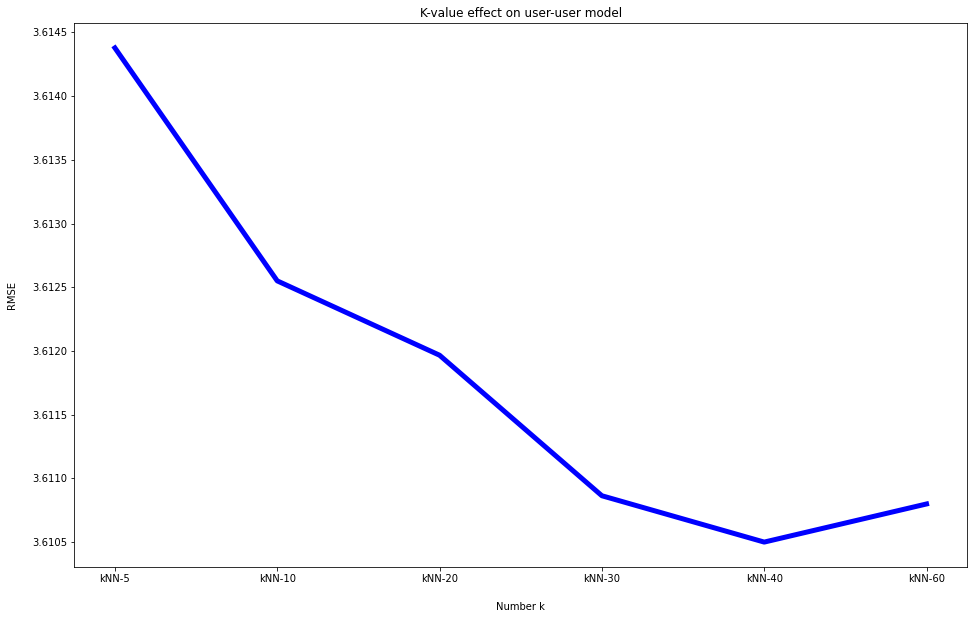

In [13]:
# Visualizing how the number of neighbors effect the root mean sqaured error
fig7, ax7 = plt.subplots()
ax7.plot(RMSE_CF_df.Model, RMSE_CF_df.RMSE, label="RMSE", color='blue', linewidth=5)
plt.xlabel("Number k", labelpad=18)
plt.ylabel("RMSE", labelpad=15)
plt.title("K-value effect on user-user model")
fig7.set_figheight(10)
fig7.set_figwidth(16)
plt.show()

### KNN (K Nearest Neighbours), memory based approach: Item-Item model (30k data)

In [14]:
new_data2 = ratings.loc[0:40000]
data_new2 = Dataset.load_from_df(new_data2, reader)
trainset, testset = train_test_split(data_new2, test_size=0.2)

In [15]:
ml_algorithms = {'kNN-5': 5, 'kNN-10': 10, 'kNN-20': 20, 'kNN-30': 30, 'kNN-40': 40, "kNN-60": 60}

models_CF = []
RMSE_CF = []
sim_options = {'name':'cosine','min_support':3,'user_based':False}
for name, num_neighbours in ml_algorithms.items(): 
    final_model = KNNBaseline(k=num_neighbours, sim_options=sim_options)
    pred = final_model.fit(trainset).test(testset)
    
    models_CF.append(name)
    RMSE_CF.append(accuracy.rmse(pred))

Estimating biases using als...
Computing the cosine similarity matrix...


d:\anaconda\lib\site-packages\surprise\prediction_algorithms\algo_base.py:249: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
RMSE: 3.5375
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.5370
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.5370
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.5368
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.5370
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 3.5370


In [16]:
RMSE_CF_dict = {"Model": models_CF, "RMSE": RMSE_CF}
RMSE_CF_df = pd.DataFrame(RMSE_CF_dict)
RMSE_CF_df

,Model,RMSE
0,kNN-5,3.537519
1,kNN-10,3.537044
2,kNN-20,3.537023
3,kNN-30,3.536823
4,kNN-40,3.537023
5,kNN-60,3.537023


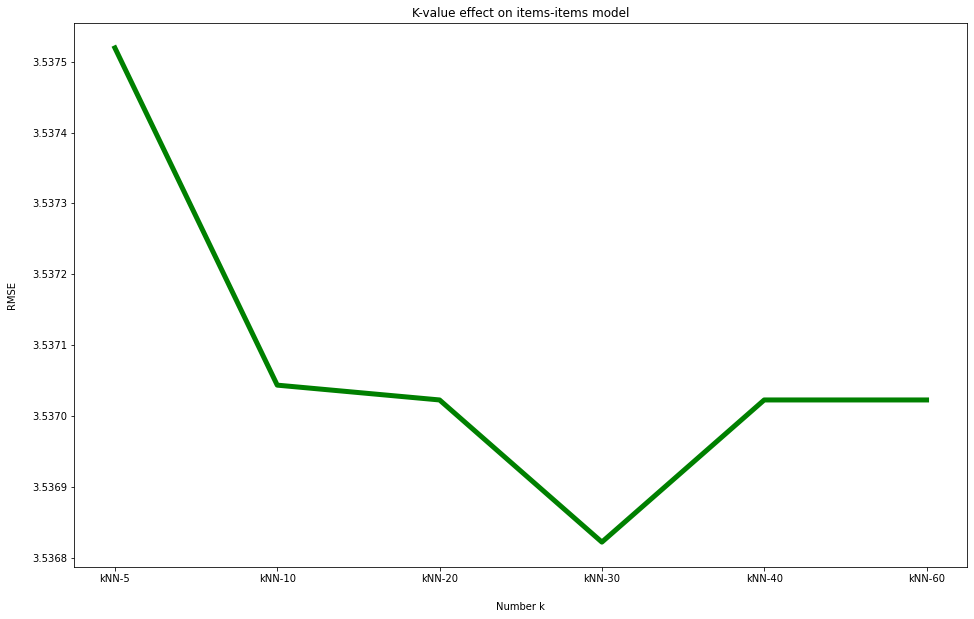

In [17]:
# Visualizing how the number of neighbors effect the root mean sqaured error
fig7, ax7 = plt.subplots()
ax7.plot(RMSE_CF_df.Model, RMSE_CF_df.RMSE, label="RMSE", color='Green', linewidth=5)
plt.xlabel("Number k", labelpad=18)
plt.ylabel("RMSE", labelpad=15)
plt.title("K-value effect on items-items model")
fig7.set_figheight(10)
fig7.set_figwidth(16)
plt.show()